# Carbonate membership functions

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def plot_fuzzy_curve(bathy,law,label,color='b'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=3, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Depth [m]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

## Relation irradiance, depth and production

Carbonates are composed of elements from diverse origine, from benthic species squeleton to ooides. The relation between production rate and irradiance is often consider crucial and requires to define each species according to 3 classes:

- **euphotic species** depends on photosynthesis such as green algae, corals, rudists
- **oligophotic species** which require light but in smaller amount such as foraminifera or red algae
- **pelagic species** species not dependent on light such as molluscs, crinoids, brachiopods.

For euphotic and oligophotic species, production rate depends on the irradiance. The irradiance decreases exponentially with depth following the Beer-Lambert curve:

$$ I(d) = I_0 e^{-d/D_o} $$

where $I$ is the irradience for a depth $d$, $I_o$ is the irradiance at the water surface and $D_0$ the depth of light intensity decrease (from 1 to 30 m). The value of $D_0$ depends of water turbidity. 

<div align="center">
    <img width=500 src="images/fuzDepth.png" alt="depth influence" title="production rate depth profile."</img>
</div>

_Typical production rate profile for shallow, open-marine production and pelagic sedimentation (adapted from [**Warrlich et al., 2002** - Basin Research])._

# Membership functions for depth

In [3]:
file = '../data/mbf_shallow_depth'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
depth = df['X'].values
Hshallow = df['Y'].values

file = '../data/mbf_medium_depth'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Hmedium = df['Y'].values

file = '../data/mbf_deep_depth'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Hdeep = df['Y'].values

# Membership functions for wave energy

In [4]:
file = '../data/mbf_low_wave'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
wave = df['X'].values
Wlow = df['Y'].values

file = '../data/mbf_med_wave'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Wmedium = df['Y'].values

file = '../data/mbf_high_wave'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Whigh = df['Y'].values

file = '../data/mbf_extreme_wave'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Wextreme = df['Y'].values

# Membership functions for production rate

In [5]:
file = '../data/mbf_low_prod'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
prod = df['X'].values
Plow = df['Y'].values

file = '../data/mbf_med_prod'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Pmedium = df['Y'].values

file = '../data/mbf_high_prod'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Phigh = df['Y'].values

file = '../data/mbf_higher_prod'
df = pd.read_csv(str(file)+'.csv', sep=' ', header=None, names=['X','Y'])
Pvhigh = df['Y'].values

# Fuzzy rules

Based on the membership functions, we define the fuzzy relationship between input and output variables. Let consider the following rules for one type of carbonate:

- If the depth is deep, then the production rate will be low
- If the depth is shallow and the wave energy is low, then the production rate will be medium
- If the depth is shallow and the wave energy is medium, then the production rate will be very high
- If the depth is shallow and the wave energy is high, then the production rate will be high
- If the depth is medium and the wave energy is high, then the production rate will be medium

Let suppose that at a given depth of 2.5 m, the considered carbonate is experiencing a wave high of 1.75 m.

In [6]:
Hcarb = 0.1
Wcarb = 1.

## Activation of MBF

In [7]:
H_lo = fuzz.interp_membership(depth, Hshallow, Hcarb)
H_md = fuzz.interp_membership(depth, Hmedium, Hcarb)
H_hi = fuzz.interp_membership(depth, Hdeep, Hcarb)

W_lo = fuzz.interp_membership(wave, Wlow, Wcarb)
W_md = fuzz.interp_membership(wave, Wmedium, Wcarb)
W_hi = fuzz.interp_membership(wave, Whigh, Wcarb)

## Rules activation

In [8]:
prod_rule1 = np.fmin(H_hi,Plow)

active_rule2 = np.fmin(H_lo,W_lo)
prod_rule2 = np.fmin(active_rule2,Pmedium)

active_rule3 = np.fmin(H_lo,W_md)
prod_rule3 = np.fmin(active_rule3,Pvhigh)

active_rule4 = np.fmin(H_lo,W_hi)
prod_rule4 = np.fmin(active_rule4,Phigh)

active_rule5 = np.fmin(H_md,W_hi)
prod_rule5 = np.fmin(active_rule5,Pmedium)

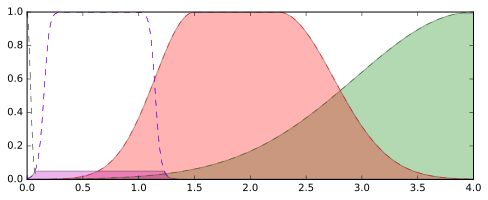

In [9]:
fig, ax0 = plt.subplots(figsize=(8, 3))

prod0 = np.zeros_like(prod)
ax0.fill_between(prod, prod0, prod_rule1, facecolor='k', alpha=0.3)
ax0.plot(prod, Plow, 'k', linewidth=0.5, linestyle='--', )
ax0.fill_between(prod, prod0, prod_rule2, facecolor='b', alpha=0.3)
ax0.plot(prod, Pmedium, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(prod, prod0, prod_rule3, facecolor='g', alpha=0.3)
ax0.plot(prod, Pvhigh, 'g', linewidth=0.5, linestyle='--', )
ax0.fill_between(prod, prod0, prod_rule4, facecolor='r', alpha=0.3)
ax0.plot(prod, Phigh, 'r', linewidth=0.5, linestyle='--', )
ax0.fill_between(prod, prod0, prod_rule5, facecolor='m', alpha=0.3)
ax0.plot(prod, Pmedium, 'm', linewidth=0.5, linestyle='--', )

plt.show()

## Rules aggregation

With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator. This step is also known as aggregation.

In [10]:
aggregate1 = np.fmax(prod_rule2,np.fmax(prod_rule3,np.fmax(prod_rule4,prod_rule5)))
aggregate2 = prod_rule1

## Defuzzyfication

In [11]:
production = fuzz.defuzz(prod, aggregate1, 'bisector')
prod_activation = fuzz.interp_membership(prod, aggregate1, production)

print 'resulting production rate for carbonate 1: ',production,' m/kyr'

resulting production rate for carbonate 1:  2.36419200834  m/kyr


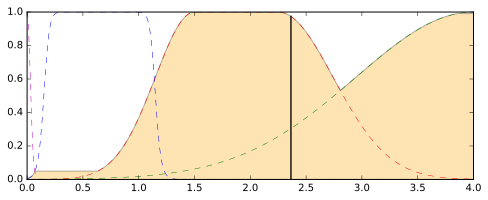

In [12]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(prod, Pmedium, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(prod, Pvhigh, 'g', linewidth=0.5, linestyle='--', )
ax0.plot(prod, Phigh, 'r', linewidth=0.5, linestyle='--', )
ax0.plot(prod, Plow, 'm', linewidth=0.5, linestyle='--', )
ax0.fill_between(prod, prod0, aggregate1, facecolor='Orange', alpha=0.3)
ax0.plot([production, production], [0, prod_activation], 'k', linewidth=1.5, alpha=0.9)

plt.show()

In [13]:
production = fuzz.defuzz(prod, aggregate2, 'centroid')
prod_activation = fuzz.interp_membership(prod, aggregate2, production)

print 'resulting production rate for carbonate 2: ',production,' m/kyr'

resulting production rate for carbonate 2:  0.0681240347949  m/kyr


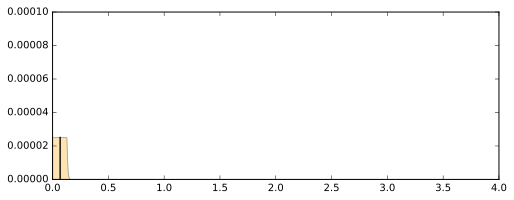

In [14]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(prod, prod0, aggregate2, facecolor='Orange', alpha=0.3)
ax0.plot([production, production], [0, prod_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_ylim([0,0.0001])

plt.show()